In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
central = pd.read_csv('central.csv')
central = central.drop(['Survey Year'], axis = 1)

In [3]:
inner = pd.read_csv('inner.csv')

In [4]:
outer = pd.read_csv('outer.csv')

In [5]:
central = central.rename(columns = {'Survey wave':'Survey Year', 'Survey date':'Survey Date'})
inner = inner.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})
outer = outer.rename(columns = {'Survey wave (year)':'Survey Year',  'Survey date':'Survey Date'})

central = central[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
inner = inner[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]
outer = outer[['Location', 'Survey Date', 'Survey Year', 'Total cycles']]

print(central)
print(inner)
print(outer)

                                  Location Survey Date  Survey Year  \
0       Millbank (south of Thorney Street)  24/01/2014         2014   
1       Millbank (south of Thorney Street)  24/01/2014         2014   
2       Millbank (south of Thorney Street)  24/01/2014         2014   
3       Millbank (south of Thorney Street)  24/01/2014         2014   
4       Millbank (south of Thorney Street)  24/01/2014         2014   
...                                    ...         ...          ...   
758158                           Haymarket  21/12/2021         2021   
758159                           Haymarket  21/12/2021         2021   
758160                           Haymarket  21/12/2021         2021   
758161                           Haymarket  21/12/2021         2021   
758162                           Haymarket  21/12/2021         2021   

        Total cycles  
0                  0  
1                 15  
2                 35  
3                 61  
4                 73  
...      

In [6]:
cycling = pd.concat([central, inner, outer])

In [7]:
cycling = cycling.groupby(['Location','Survey Year', 'Survey Date'], as_index=False).sum()

print(cycling)

             Location  Survey Year Survey Date  Total cycles
0          Abbey Road         2015    01/06/15            79
1          Abbey Road         2015    02/06/15            52
2          Abbey Road         2016    18/04/16            84
3          Abbey Road         2016    19/04/16            86
4          Abbey Road         2017    15/06/17           136
...               ...          ...         ...           ...
33038  Zetland Street         2018  26/06/2018            24
33039  Zetland Street         2019  11/06/2019            21
33040  Zetland Street         2019  12/06/2019            15
33041  Zetland Street         2021  11/05/2021            37
33042  Zetland Street         2021  12/05/2021            40

[33043 rows x 4 columns]


In [8]:
cycling = cycling[['Location', 'Survey Year', 'Total cycles']]
cycling = cycling.groupby(['Location','Survey Year'],as_index=False).mean().round()

cycling = cycling[cycling['Survey Year'] != 2019]
cycling = cycling.rename(columns = {'Total cycles':'Average daily cycles'})

print(cycling)

            Location  Survey Year  Average daily cycles
0         Abbey Road         2015                  66.0
1         Abbey Road         2016                  85.0
2         Abbey Road         2017                 112.0
3         Abbey Road         2018                  82.0
5         Abbey Road         2020                 102.0
...              ...          ...                   ...
8039  Zetland Street         2015                  32.0
8040  Zetland Street         2016                  18.0
8041  Zetland Street         2017                  17.0
8042  Zetland Street         2018                  11.0
8044  Zetland Street         2021                  38.0

[6859 rows x 3 columns]


In [9]:
sites = pd.read_csv('sites.csv')

In [10]:
bike_sites = sites[['Functional cycling area', 'Borough', 'Location']]

bike_sites.shape

(2023, 3)

In [11]:
bike_sites = bike_sites.drop_duplicates()
bike_sites.shape

(1817, 3)

In [12]:
tracks = pd.read_csv('tracks.csv')

print(tracks.shape)
tracks = tracks[tracks['Survey Year'] != 2019]
tracks

(24353, 22)


,Borough,ID,Survey Date,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,...,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Access Times,Colour
0,Newham,RWG154883,16/10/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
1,TowerHamlets,RWG073210,03/07/2017,2017,0,0,0,1,0.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
2,Newham,RWG154882,16/10/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
3,WalthamForest,RWG150124,28/09/2017,2017,0,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,RED
4,Greenwich,RWG184761,08/11/2017,2017,1,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,None,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,Hillingdon,RWG235057,12/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
24349,Hillingdon,RWG291436,29/03/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,1,0,0,1,None,NONE
24350,Hillingdon,RWG234840,08/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,0,0,0,1,None,NONE
24351,Hillingdon,RWG237636,31/01/2018,2018,0,0,0,0,1.0,0.0,...,0,1,0,0,1,1,0,1,None,NONE


In [13]:
tracks = tracks.drop(['ID', 'Access Times', 'Colour'], axis=1)

In [14]:
tracks_date = tracks.groupby(['Borough', 'Survey Year', 'Survey Date']).agg('sum').reset_index()

tracks_date

,Borough,Survey Year,Survey Date,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes
0,Barking&Dagenham,2017,03/11/2017,18,1,0,1,2.0,0.0,17,6.0,1,2,0,0,0,0,0,21
1,Barking&Dagenham,2017,05/11/2017,26,0,0,6,9.0,0.0,23,6.0,0,11,0,0,6,0,3,38
2,Barking&Dagenham,2017,07/11/2017,19,0,0,0,8.0,7.0,7,6.0,0,3,0,0,0,0,1,22
3,Barking&Dagenham,2017,08/11/2017,1,0,0,6,3.0,0.0,1,0.0,0,9,0,0,1,0,0,10
4,Barking&Dagenham,2017,09/10/2017,8,1,0,0,0.0,0.0,7,4.0,1,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Westminster,2018,11/01/2018,1,0,0,0,5.0,1.0,0,0.0,0,4,0,0,5,0,5,6
1602,Westminster,2018,12/01/2018,0,0,0,1,2.0,0.0,0,0.0,0,2,0,0,0,0,0,3
1603,Westminster,2018,15/01/2018,1,2,0,0,0.0,0.0,0,0.0,0,2,1,0,0,0,0,2
1604,Westminster,2018,16/03/2018,4,0,0,0,4.0,0.0,0,0.0,0,0,0,0,0,0,4,4


In [15]:
tracks_sum = tracks_date.groupby(['Borough', 'Survey Year']).agg('sum').reset_index()
tracks_mean = tracks_date.groupby(['Borough', 'Survey Year']).agg('mean').reset_index()

tracks_mean['Average Tracks or Lanes'] = tracks_mean['Total Tracks or Lanes']
tracks_mean['Total Tracks or Lanes'] = tracks_sum['Total Tracks or Lanes']

pd.set_option('display.max_rows', None)

tracks_mean

,Borough,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes
0,Barking&Dagenham,2017,15.625000,1.041667,0.000000,5.708333,5.583333,1.250000,11.708333,5.041667,0.416667,7.333333,0.041667,0.041667,1.375000,0.041667,1.500000,608,25.333333
1,Barking&Dagenham,2018,2.250000,0.650000,0.000000,0.450000,7.900000,0.100000,1.000000,0.100000,0.550000,7.750000,0.000000,0.050000,2.850000,0.250000,0.900000,205,10.250000
2,Barnet,2018,2.531250,1.156250,0.000000,0.562500,10.125000,0.656250,0.687500,0.156250,0.218750,10.468750,0.000000,0.000000,5.906250,0.406250,0.875000,425,13.281250
3,Bexley,2017,5.173913,1.173913,0.000000,4.304348,4.652174,0.521739,3.739130,1.434783,0.173913,7.782609,0.000000,0.000000,1.782609,0.869565,0.086957,332,14.434783
4,Bexley,2018,4.714286,2.357143,0.928571,0.785714,7.428571,0.285714,1.571429,0.071429,0.000000,7.714286,0.000000,0.000000,3.214286,0.500000,0.000000,178,12.714286
5,Brent,2018,5.324324,0.054054,0.000000,2.837838,8.513514,0.756757,2.837838,0.486486,0.270270,8.621622,0.054054,0.135135,4.513514,0.324324,1.594595,539,14.567568
6,Bromley,2017,5.727273,0.590909,0.045455,3.045455,6.000000,1.090909,3.818182,1.318182,0.090909,8.818182,0.000000,0.000000,3.909091,0.045455,0.454545,329,14.954545
7,Bromley,2018,3.294118,1.235294,0.000000,0.705882,5.000000,0.352941,1.470588,0.411765,0.117647,5.235294,0.058824,0.000000,3.764706,0.176471,0.000000,149,8.764706
8,Camden,2017,10.014286,1.657143,0.271429,0.914286,3.071429,1.957143,3.185714,0.671429,1.985714,1.042857,0.000000,0.071429,0.442857,0.085714,2.014286,763,10.900000
9,Camden,2018,2.833333,0.333333,0.000000,0.000000,1.666667,0.500000,0.833333,0.333333,1.000000,0.500000,0.000000,0.000000,0.166667,0.000000,0.666667,21,3.500000


In [16]:
tracks_mean['Borough'][0] = 'Barking & Dagenham'
tracks_mean['Borough'][1] = 'Barking & Dagenham'

tracks_mean['Borough'][10] = 'City of London'
tracks_mean['Borough'][11] = 'City of London'

tracks_mean['Borough'][22] = 'Hammersmith & Fulham'
tracks_mean['Borough'][23] = 'Hammersmith & Fulham'

tracks_mean['Borough'][34] = 'Kensington & Chelsea'
tracks_mean['Borough'][35] = 'Kensington & Chelsea'

tracks_mean['Borough'][36] = 'Kingston upon Thames'
tracks_mean['Borough'][37] = 'Kingston upon Thames'

tracks_mean['Borough'][48] = 'Richmond upon Thames'
tracks_mean['Borough'][49] = 'Richmond upon Thames'

tracks_mean['Borough'][54] = 'Tower Hamlets'
tracks_mean['Borough'][55] = 'Tower Hamlets'

tracks_mean['Borough'][56] = 'Waltham Forest'
tracks_mean['Borough'][57] = 'Waltham Forest'

tracks_mean

C:\Users\jakee\AppData\Local\Temp/ipykernel_45848/2079848916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_mean['Borough'][0] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_45848/2079848916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_mean['Borough'][1] = 'Barking & Dagenham'
C:\Users\jakee\AppData\Local\Temp/ipykernel_45848/2079848916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr

,Borough,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes
0,Barking & Dagenham,2017,15.625000,1.041667,0.000000,5.708333,5.583333,1.250000,11.708333,5.041667,0.416667,7.333333,0.041667,0.041667,1.375000,0.041667,1.500000,608,25.333333
1,Barking & Dagenham,2018,2.250000,0.650000,0.000000,0.450000,7.900000,0.100000,1.000000,0.100000,0.550000,7.750000,0.000000,0.050000,2.850000,0.250000,0.900000,205,10.250000
2,Barnet,2018,2.531250,1.156250,0.000000,0.562500,10.125000,0.656250,0.687500,0.156250,0.218750,10.468750,0.000000,0.000000,5.906250,0.406250,0.875000,425,13.281250
3,Bexley,2017,5.173913,1.173913,0.000000,4.304348,4.652174,0.521739,3.739130,1.434783,0.173913,7.782609,0.000000,0.000000,1.782609,0.869565,0.086957,332,14.434783
4,Bexley,2018,4.714286,2.357143,0.928571,0.785714,7.428571,0.285714,1.571429,0.071429,0.000000,7.714286,0.000000,0.000000,3.214286,0.500000,0.000000,178,12.714286
5,Brent,2018,5.324324,0.054054,0.000000,2.837838,8.513514,0.756757,2.837838,0.486486,0.270270,8.621622,0.054054,0.135135,4.513514,0.324324,1.594595,539,14.567568
6,Bromley,2017,5.727273,0.590909,0.045455,3.045455,6.000000,1.090909,3.818182,1.318182,0.090909,8.818182,0.000000,0.000000,3.909091,0.045455,0.454545,329,14.954545
7,Bromley,2018,3.294118,1.235294,0.000000,0.705882,5.000000,0.352941,1.470588,0.411765,0.117647,5.235294,0.058824,0.000000,3.764706,0.176471,0.000000,149,8.764706
8,Camden,2017,10.014286,1.657143,0.271429,0.914286,3.071429,1.957143,3.185714,0.671429,1.985714,1.042857,0.000000,0.071429,0.442857,0.085714,2.014286,763,10.900000
9,Camden,2018,2.833333,0.333333,0.000000,0.000000,1.666667,0.500000,0.833333,0.333333,1.000000,0.500000,0.000000,0.000000,0.166667,0.000000,0.666667,21,3.500000


In [17]:
bike_sites_cycles_year = pd.merge(bike_sites, cycling, on=['Location'])
bike_sites_cycles_year

,Functional cycling area,Borough,Location,Survey Year,Average daily cycles
0,Outer,Hillingdon,Summerhouse Lane,2015,2.0
1,Outer,Hillingdon,Summerhouse Lane,2016,8.0
2,Outer,Hillingdon,Summerhouse Lane,2017,1.0
3,Outer,Hillingdon,Summerhouse Lane,2018,6.0
4,Outer,Hillingdon,Summerhouse Lane,2021,1.0
5,Outer,Hillingdon,Widewater Lock,2015,42.0
6,Outer,Hillingdon,Widewater Lock,2016,27.0
7,Outer,Hillingdon,Widewater Lock,2017,45.0
8,Outer,Hillingdon,Widewater Lock,2018,33.0
9,Outer,Hillingdon,Widewater Lock,2021,40.0


In [18]:
borough_cycles = bike_sites_cycles_year.groupby(['Functional cycling area', 'Borough', 'Survey Year'], 
                                                as_index=False).mean().round()    

borough_cycles

,Functional cycling area,Borough,Survey Year,Average daily cycles
0,Central,Camden,2014,877.0
1,Central,Camden,2015,467.0
2,Central,Camden,2016,464.0
3,Central,Camden,2017,430.0
4,Central,Camden,2018,463.0
5,Central,Camden,2020,545.0
6,Central,Camden,2021,458.0
7,Central,City of London,2014,1002.0
8,Central,City of London,2015,807.0
9,Central,City of London,2016,938.0


In [19]:
cycle_tracks_year = pd.merge(tracks_mean, borough_cycles, on=['Borough', 'Survey Year'])

cycle_tracks_year

,Borough,Survey Year,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,...,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes,Functional cycling area,Average daily cycles
0,Barking & Dagenham,2017,15.625000,1.041667,0.000000,5.708333,5.583333,1.250000,11.708333,5.041667,...,7.333333,0.041667,0.041667,1.375000,0.041667,1.500000,608,25.333333,Outer,66.0
1,Barking & Dagenham,2018,2.250000,0.650000,0.000000,0.450000,7.900000,0.100000,1.000000,0.100000,...,7.750000,0.000000,0.050000,2.850000,0.250000,0.900000,205,10.250000,Outer,62.0
2,Barnet,2018,2.531250,1.156250,0.000000,0.562500,10.125000,0.656250,0.687500,0.156250,...,10.468750,0.000000,0.000000,5.906250,0.406250,0.875000,425,13.281250,Outer,105.0
3,Bexley,2017,5.173913,1.173913,0.000000,4.304348,4.652174,0.521739,3.739130,1.434783,...,7.782609,0.000000,0.000000,1.782609,0.869565,0.086957,332,14.434783,Outer,56.0
4,Bexley,2018,4.714286,2.357143,0.928571,0.785714,7.428571,0.285714,1.571429,0.071429,...,7.714286,0.000000,0.000000,3.214286,0.500000,0.000000,178,12.714286,Outer,55.0
5,Brent,2018,5.324324,0.054054,0.000000,2.837838,8.513514,0.756757,2.837838,0.486486,...,8.621622,0.054054,0.135135,4.513514,0.324324,1.594595,539,14.567568,Outer,121.0
6,Bromley,2017,5.727273,0.590909,0.045455,3.045455,6.000000,1.090909,3.818182,1.318182,...,8.818182,0.000000,0.000000,3.909091,0.045455,0.454545,329,14.954545,Outer,43.0
7,Bromley,2018,3.294118,1.235294,0.000000,0.705882,5.000000,0.352941,1.470588,0.411765,...,5.235294,0.058824,0.000000,3.764706,0.176471,0.000000,149,8.764706,Outer,46.0
8,Camden,2017,10.014286,1.657143,0.271429,0.914286,3.071429,1.957143,3.185714,0.671429,...,1.042857,0.000000,0.071429,0.442857,0.085714,2.014286,763,10.900000,Central,430.0
9,Camden,2018,2.833333,0.333333,0.000000,0.000000,1.666667,0.500000,0.833333,0.333333,...,0.500000,0.000000,0.000000,0.166667,0.000000,0.666667,21,3.500000,Central,463.0


In [20]:
cycle_tracks_year.to_csv('tracks_merge.csv')

In [21]:
cycle_tracks_year = cycle_tracks_year.drop(['Survey Year'], axis = 1)

cycle_track_cor = cycle_tracks_year.corr()

cycle_track_cor

,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0),Total Tracks or Lanes,Average Tracks or Lanes,Average daily cycles
On-Carriageway (if 1) or Off-Carriageway (if 0),1.000000,0.424851,0.104523,0.478646,0.273618,0.651608,0.893496,0.868732,0.239326,0.307000,0.379755,0.261616,0.016872,-0.014947,0.486488,0.649222,0.826015,-0.062387
Segregated Lane/Track,0.424851,1.000000,0.299273,0.364127,0.212379,0.435558,0.220920,0.283416,0.138185,0.383527,0.276132,0.284487,-0.064369,0.049701,0.086575,0.165651,0.471530,0.167747
Stepped Lane/Track,0.104523,0.299273,1.000000,-0.015978,0.042627,0.052383,0.046372,0.048227,-0.098824,0.015614,0.103085,0.021440,-0.001033,0.080114,-0.019895,0.164372,0.070365,-0.087370
Partially Segregated Lane/Track,0.478646,0.364127,-0.015978,1.000000,0.360587,0.759648,0.350686,0.450433,-0.100462,0.697262,0.168145,0.633599,0.114460,0.331009,0.313733,0.375982,0.768561,-0.297157
Shared Lane or Footway,0.273618,0.212379,0.042627,0.360587,1.000000,0.304167,0.057111,0.117830,0.149008,0.852087,0.453168,0.131214,0.869961,0.318835,0.592305,0.370883,0.653967,-0.334238
Mandatory Cycle Lane,0.651608,0.435558,0.052383,0.759648,0.304167,1.000000,0.404895,0.459981,0.020350,0.488440,0.174742,0.490259,0.054898,0.222985,0.532627,0.550317,0.721631,-0.088243
Advisory Cycle Lane,0.893496,0.220920,0.046372,0.350686,0.057111,0.404895,1.000000,0.925108,0.022420,0.149945,0.260994,0.192359,-0.120059,-0.062126,0.181402,0.523629,0.681500,-0.208651
Cycle Lane/Track Priority,0.868732,0.283416,0.048227,0.450433,0.117830,0.459981,0.925108,1.000000,0.042596,0.228062,0.358180,0.361798,-0.071397,-0.004731,0.252278,0.483059,0.720987,-0.199885
Contraflow Lane/Track,0.239326,0.138185,-0.098824,-0.100462,0.149008,0.020350,0.022420,0.042596,1.000000,-0.026104,0.248897,-0.075693,0.070904,-0.176260,0.202288,0.033865,0.115549,0.362897
Bi-directional,0.307000,0.383527,0.015614,0.697262,0.852087,0.488440,0.149945,0.228062,-0.026104,1.000000,0.334900,0.336539,0.674755,0.447510,0.364045,0.345890,0.776499,-0.399605


In [22]:
daily_cycles_cor = round(cycle_track_cor[['Average daily cycles']],2)
daily_cycles_cor

,Average daily cycles
On-Carriageway (if 1) or Off-Carriageway (if 0),-0.06
Segregated Lane/Track,0.17
Stepped Lane/Track,-0.09
Partially Segregated Lane/Track,-0.30
Shared Lane or Footway,-0.33
Mandatory Cycle Lane,-0.09
Advisory Cycle Lane,-0.21
Cycle Lane/Track Priority,-0.20
Contraflow Lane/Track,0.36
Bi-directional,-0.40


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.174
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.283
Time:                        17:03:38   Log-Likelihood:                -413.67
No. Observations:                  61   AIC:                             831.3
Df Residuals:                      59   BIC:                             835.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    295.7672     46.963      6.298      0.000     201.795     389.740
X             -0.1063      0.098     -1.084      0.283      -0.302       0.090
==============================================================================
Omnibus:                       30.466   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.176
Skew:                           1.671   Prob(JB):                     1.41e-13
Kurtosis:                       6.481   Cond. No.                         810.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

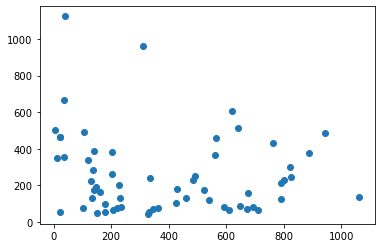

In [23]:
# Independent variable is set as number of tracks.
X = cycle_tracks_year["Total Tracks or Lanes"]

# Dependent variable is set as Total Cyclists.
y = cycle_tracks_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = cycle_tracks_year).fit()

# Prints the regression table
test.summary()

<AxesSubplot:xlabel='Total Tracks or Lanes', ylabel='Average daily cycles'>

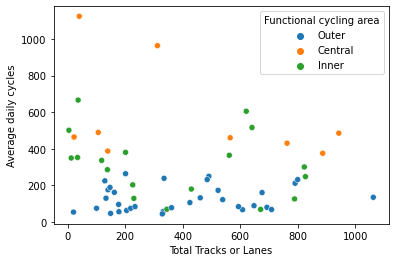

In [24]:
sns.scatterplot(x='Total Tracks or Lanes', y='Average daily cycles', data=cycle_tracks_year, hue='Functional cycling area')

In [25]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    295.767183
X             -0.106260
dtype: float64
Standard errors:  Intercept    46.962911
X             0.098053
dtype: float64
Predicted values:  [231.16126341 273.98393709 250.60679513 260.4889506  276.85294997
 238.49318521 260.80772981 279.93448232 214.69100431 293.53572855
 262.61414532 291.51679356 222.12918584 272.49630079 281.6346381
 182.81308345 226.91087397 270.90240474 224.46690003 259.10757403
 227.65469212 295.34214406 236.04921128 292.15435198 211.71573169
 232.64889972 285.14120939 293.64198829 220.42903006 260.17017139
 210.75939407 229.77988684 291.94183251 274.40897604 294.49206617
 243.59365255 274.40897604 201.51479702 280.99707968 250.07549645
 271.75248263 246.78144463 278.55310575 211.92825116 271.32744369
 240.19334099 280.89081994 282.05967704 244.23121096 195.56425179
 284.50365097 257.40741825 276.95920971 208.31542013 283.22853414
 223.93560135 280.14700179 207.89038119 281.10333942 235.73043207
 293.42946881]


In [26]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -0.0095* X + 254.88

# View the output.
y_pred

0     249.1040
1     252.9325
2     250.8425
3     251.7260
4     253.1890
5     249.7595
6     251.7545
7     253.4645
8     247.6315
9     254.6805
10    251.9160
11    254.5000
12    248.2965
13    252.7995
14    253.6165
15    244.7815
16    248.7240
17    252.6570
18    248.5055
19    251.6025
20    248.7905
21    254.8420
22    249.5410
23    254.5570
24    247.3655
25    249.2370
26    253.9300
27    254.6900
28    248.1445
29    251.6975
30    247.2800
31    248.9805
32    254.5380
33    252.9705
34    254.7660
35    250.2155
36    252.9705
37    246.4535
38    253.5595
39    250.7950
40    252.7330
41    250.5005
42    253.3410
43    247.3845
44    252.6950
45    249.9115
46    253.5500
47    253.6545
48    250.2725
49    245.9215
50    253.8730
51    251.4505
52    253.1985
53    247.0615
54    253.7590
55    248.4580
56    253.4835
57    247.0235
58    253.5690
59    249.5125
60    254.6710
Name: Total Tracks or Lanes, dtype: float64

Text(0, 0.5, 'Average daily cyclists')

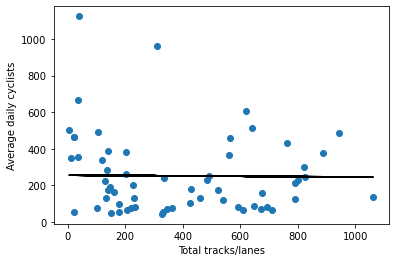

In [27]:
# Plot the graph with a regression line.

plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Total tracks/lanes")
plt.ylabel("Average daily cyclists")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.762
Date:                Mon, 10 Oct 2022   Prob (F-statistic):             0.0117
Time:                        17:03:39   Log-Likelihood:                -410.96
No. Observations:                  61   AIC:                             825.9
Df Residuals:                      59   BIC:                             830.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    372.2870     52.435      7.100      0.000     267.365     477.209
X             -7.9475      3.056     -2.600      0.012     -14.063      -1.832
==============================================================================
Omnibus:                       32.421   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.561
Skew:                           1.674   Prob(JB):                     1.06e-16
Kurtosis:                       7.211   Cond. No.                         34.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

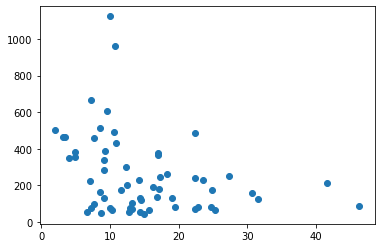

In [28]:
# Independent variable is set as number of tracks.
X = cycle_tracks_year["Average Tracks or Lanes"]

# Dependent variable is set as Average Cyclists.
y = cycle_tracks_year["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = cycle_tracks_year).fit()

# Prints the regression table
test.summary()

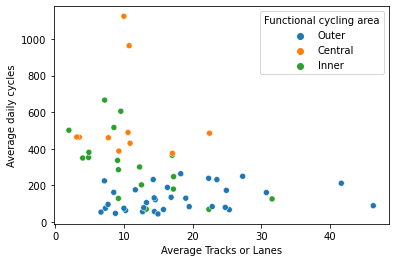

In [29]:
sns.scatterplot(x='Average Tracks or Lanes', y='Average daily cycles', data=cycle_tracks_year, hue='Functional cycling area')
plt.savefig('AverageCyclistsVsTracksArea.png')

In [30]:
# Extract the estimated parameters.
print("Parameters: ", test.params)
    
# Extract the standard errors.
print("Standard errors: ", test.bse)    

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    372.286977
X             -7.947532
dtype: float64
Standard errors:  Intercept    52.434867
X             3.056267
dtype: float64
Predicted values:  [170.94951075 290.82477875 266.73382364 257.56608681 271.23979021
 256.51077415 253.43525518 302.62920065 285.65888322 344.47061691
 286.78249975 292.81166164 175.58557084 314.26999691 221.28387742
 238.18815094   4.42980146 217.31011163 194.52718777 266.82934686
 304.3620742  356.39191428 236.93810629 333.68468119  41.41868903
 190.71644827 292.81166164 319.30343357 247.0692021  194.79210549
 185.28623438 296.35748342 315.06475006 333.32468847 340.49685112
 155.49597712 227.06390039 236.72042914 298.63985147 235.58943427
 272.50130316 257.79285062 304.52381344 121.46288078 299.1696869
 174.35559571 279.56577567 315.32966778 258.91777696 193.84597078
 288.04314269 269.82058814 311.12553876 274.66282087 300.14784464
 128.08100708 242.47729497 235.35763126 299.1696869  310.77526042
 347.30902105]


In [31]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -5.512 * X + 335.415

# View the output.
y_pred

0     195.777667
1     278.917000
2     262.208750
3     255.850478
4     265.333857
5     255.118568
6     252.985545
7     287.103941
8     275.334200
9     316.123000
10    276.113483
11    280.295000
12    198.993000
13    295.177400
14    230.687000
15    242.410937
16     80.288143
17    227.931000
18    212.129933
19    262.275000
20    288.305773
21    324.391000
22    241.543970
23    308.642429
24    105.941737
25    209.487000
26    280.295000
27    298.668333
28    248.570378
29    212.313667
30    205.720882
31    282.754200
32    295.728600
33    308.392756
34    313.367000
35    185.059889
36    234.695727
37    241.393000
38    284.337133
39    240.608600
40    266.208778
41    256.007750
42    288.417947
43    161.456280
44    284.704600
45    198.139952
46    271.108333
47    295.912333
48    256.787941
49    211.657476
50    276.987800
51    264.349571
52    292.996565
53    267.707896
54    285.383000
55    166.046273
56    245.385667
57    240.447833
58    284.7046

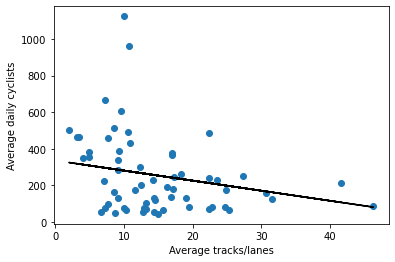

In [32]:
# Plot the graph with a regression line.
plt.scatter(X,y)

# Plot the line.
plt.plot(X,y_pred, color='black')
plt.xlabel("Average tracks/lanes")
plt.ylabel("Average daily cyclists")
plt.savefig('AverageCyclistsVsTracks.png')

In [33]:
central_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Central'] 

central_tracks_cor = central_tracks.corr()

central_tracks_cor = round(central_tracks_cor[['Average daily cycles']],2)

central_tracks_cor = central_tracks_cor.rename(columns = {'Average daily cycles' : 'Central daily cycles'})
central_tracks_cor = central_tracks_cor.reset_index()

In [34]:
inner_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Inner'] 

inner_tracks_cor = inner_tracks.corr()

inner_tracks_cor = round(inner_tracks_cor[['Average daily cycles']],2)

inner_tracks_cor = inner_tracks_cor.rename(columns = {'Average daily cycles' : 'Inner daily cycles'})
inner_tracks_cor = inner_tracks_cor.reset_index()

In [35]:
outer_tracks = cycle_tracks_year[cycle_tracks_year['Functional cycling area'] == 'Outer'] 

outer_tracks_cor = outer_tracks.corr()

outer_tracks_cor = round(outer_tracks_cor[['Average daily cycles']],2)

outer_tracks_cor = outer_tracks_cor.rename(columns = {'Average daily cycles' : 'Outer daily cycles'})
outer_tracks_cor = outer_tracks_cor.reset_index()

In [36]:
daily_cycles_cor = daily_cycles_cor.rename(columns = {'Average daily cycles' : 'Overall average daily cycles'})
daily_cycles_cor = daily_cycles_cor.reset_index()

In [37]:
correlation = pd.merge(daily_cycles_cor, central_tracks_cor, on=['index'])
correlation = pd.merge(correlation, inner_tracks_cor, on=['index'])
correlation = pd.merge(correlation, outer_tracks_cor, on=['index'])
correlation = correlation.rename(columns = {'index' : 'Track type'})
correlation 

,Track type,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,On-Carriageway (if 1) or Off-Carriageway (if 0),-0.06,-0.02,-0.35,0.29
1,Segregated Lane/Track,0.17,0.56,-0.35,0.41
2,Stepped Lane/Track,-0.09,-0.37,-0.11,-0.09
3,Partially Segregated Lane/Track,-0.30,-0.28,-0.63,-0.04
4,Shared Lane or Footway,-0.33,-0.38,-0.56,0.25
5,Mandatory Cycle Lane,-0.09,-0.12,-0.49,0.13
6,Advisory Cycle Lane,-0.21,-0.08,-0.31,0.18
7,Cycle Lane/Track Priority,-0.20,-0.06,-0.32,0.21
8,Contraflow Lane/Track,0.36,0.48,-0.00,0.35
9,Bi-directional,-0.40,0.48,-0.68,0.14


In [38]:
area_count = cycle_tracks_year[['Functional cycling area']]
area_count['Count'] = 1
area_count = area_count.groupby(['Functional cycling area'], as_index=False).sum()
area_count

C:\Users\jakee\AppData\Local\Temp/ipykernel_45848/1237014261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_count['Count'] = 1


,Functional cycling area,Count
0,Central,10
1,Inner,18
2,Outer,33


C:\Users\jakee\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                  0.009993
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.923
Time:                        17:03:40   Log-Likelihood:                -69.215
No. Observations:                  10   AIC:                             142.4
Df Residuals:                       8   BIC:                             143.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    580.9269    188.474      3.082      0.015     146.306    1015.548
X             -1.5867     15.873     -0.100      0.923     -38.190      35.016
==============================================================================
Omnibus:                        8.031   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                3.839
Skew:                           1.497   Prob(JB):                        0.147
Kurtosis:                       3.501   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

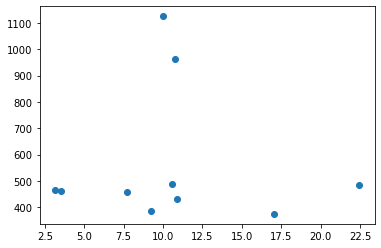

In [39]:
# Independent variable is set as number of tracks.
X = central_tracks["Average Tracks or Lanes"]

# Dependent variable is set as Average Cyclists.
y = central_tracks["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = central_tracks).fit()

# Prints the regression table
test.summary()

C:\Users\jakee\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     8.708
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00939
Time:                        17:03:40   Log-Likelihood:                -114.10
No. Observations:                  18   AIC:                             232.2
Df Residuals:                      16   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    483.3121     66.494      7.269      0.000     342.352     624.272
X            -14.2791      4.839     -2.951      0.009     -24.537      -4.021
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.682
Skew:                           0.458   Prob(JB):                        0.711
Kurtosis:                       2.733   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

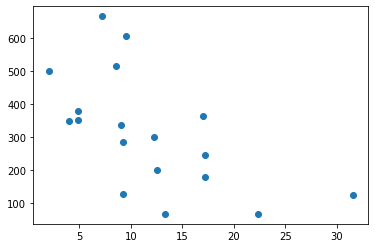

In [40]:
# Independent variable is set as number of tracks.
X = inner_tracks["Average Tracks or Lanes"]

# Dependent variable is set as Average Cyclists.
y = inner_tracks["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = inner_tracks).fit()

# Prints the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.315
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.138
Time:                        17:03:40   Log-Likelihood:                -184.85
No. Observations:                  33   AIC:                             373.7
Df Residuals:                      31   BIC:                             376.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.4046     25.604      3.648      0.001      41.185     145.624
X              1.9518      1.283      1.522      0.138      -0.664       4.568
==============================================================================
Omnibus:                        4.344   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                2.860
Skew:                           0.541   Prob(JB):                        0.239
Kurtosis:                       2.047   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

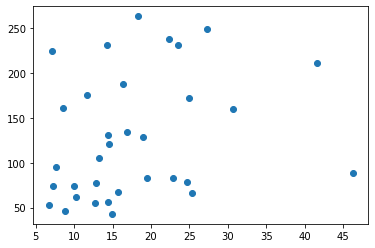

In [41]:
# Independent variable is set as number of tracks.
X = outer_tracks["Average Tracks or Lanes"]

# Dependent variable is set as Average Cyclists.
y = outer_tracks["Average daily cycles"] 

# OLS model and summary.

# Scatter plot is created between both variables
plt.scatter(X,y)

f = 'y ~ X'

# test is set as the OLS model of the data
test = ols(f, data = outer_tracks).fit()

# Prints the regression table
test.summary()

In [42]:
tracks['Track type'] = 'Total'
tracks = tracks.drop(['Borough', 'Survey Date', 'Survey Year', 'Total Tracks or Lanes'], axis=1)

In [43]:
tracks = tracks.groupby(['Track type'], as_index=True).sum()
tracks

,On-Carriageway (if 1) or Off-Carriageway (if 0),Segregated Lane/Track,Stepped Lane/Track,Partially Segregated Lane/Track,Shared Lane or Footway,Mandatory Cycle Lane,Advisory Cycle Lane,Cycle Lane/Track Priority,Contraflow Lane/Track,Bi-directional,Cycle Bypass,Continuous Cycle Facilities at Bus Stop,Park Route,Waterside Route,Part-time (if 1) or Full-time (if 0)
Track type,,,,,,,,,,,,,,,
Total,13618,1901,104,3509,9674.0,1822.0,7159,2235.0,1486,9827,63,132,3769,518,2503


In [44]:
bar_tracks = tracks.transpose()
bar_tracks = bar_tracks.reset_index().sort_values(by='Total', ascending=False)
bar_tracks = bar_tracks.rename(columns = {'Track type' : 'index', 'index' : 'Track type'})
bar_tracks

Track type,Track type,Total
0,On-Carriageway (if 1) or Off-Carriageway (if 0),13618.0
9,Bi-directional,9827.0
4,Shared Lane or Footway,9674.0
6,Advisory Cycle Lane,7159.0
12,Park Route,3769.0
3,Partially Segregated Lane/Track,3509.0
14,Part-time (if 1) or Full-time (if 0),2503.0
7,Cycle Lane/Track Priority,2235.0
1,Segregated Lane/Track,1901.0
5,Mandatory Cycle Lane,1822.0


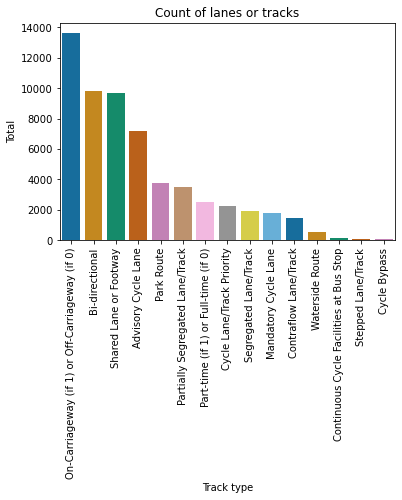

In [45]:
sns.barplot(x='Track type', y='Total', data=bar_tracks, palette='colorblind').set(title='Count of lanes or tracks')
plt.xticks(rotation=90)
plt.savefig('TrackTypeVolume.png', bbox_inches='tight', dpi=150)

In [46]:
bar_tracks = bar_tracks[bar_tracks['Total'] > 7000]
most_freq_tracks_cor = pd.merge(bar_tracks, correlation, on=['Track type'])
                        
most_freq_tracks_cor

,Track type,Total,Overall average daily cycles,Central daily cycles,Inner daily cycles,Outer daily cycles
0,On-Carriageway (if 1) or Off-Carriageway (if 0),13618.0,-0.06,-0.02,-0.35,0.29
1,Bi-directional,9827.0,-0.40,0.48,-0.68,0.14
2,Shared Lane or Footway,9674.0,-0.33,-0.38,-0.56,0.25
3,Advisory Cycle Lane,7159.0,-0.21,-0.08,-0.31,0.18
